#Домашнее задание: реализация модели latent diffusion

##Интро
На семинарах мы познакомились с тем, как обучать диффузионную модель. Эти модели были реализованы через пиксельную диффузию, которую на практике уже никто не использует, потому что это вычислительно сложно обучить. На семинарах было разобрано обучение диффузионной модели. Для обучения вам предлагается обучение модели на датасете `nelorth/oxford-flowers` (https://huggingface.co/datasets/nelorth/oxford-flowers)  

##Цель домашнего задания
Научиться реализовать модель диффузии, модель скрытой диффузии и вносить в нее модификации.

### [5 баллов] Реализация обучения диффузионной модели на новом датасете

В этой части задания вам рекомендуется взять код с семинара и адаптировать его под обучение на новом датасете.

**Ожидаемый результат**

В качестве результатов модели, от вас требуется предоставить визуализации генераций, полученных от вашей модели и код обучения модели.

In [1]:
!pip install diffusers -U

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from huggingface_hub import notebook_login

notebook_login()

In [3]:
!sudo apt -qq install git-lfs
!git config --global credential.helper store

git-lfs is already the newest version (3.0.2-1ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [4]:
!pip install datasets


In [41]:
torch_device = "cuda"

In [56]:
from datasets import load_dataset

dataset = load_dataset("nelorth/oxford-flowers")

In [57]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 7169
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 1020
    })
})

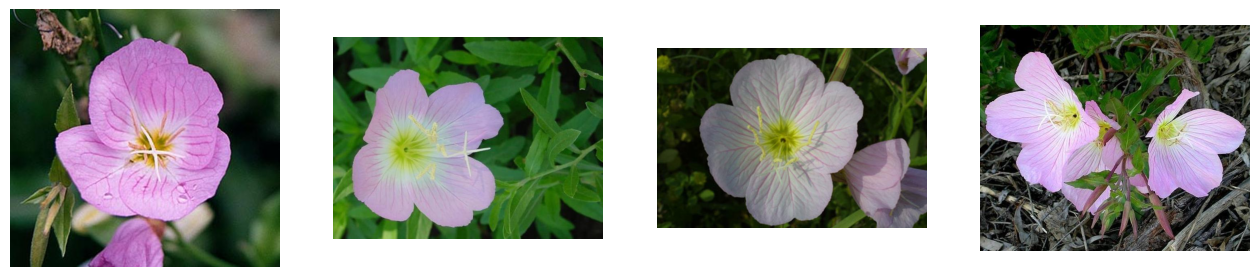

In [58]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

num_images = 4
for i in range(num_images):
    image = dataset["train"][i]["image"]
    label = dataset["train"][i]["label"]

    axs[i].imshow(image)
    axs[i].set_axis_off()

In [59]:
from torchvision import transforms

image_size = 128

preprocess = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    #transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

In [60]:
def transform(examples):
    images = [preprocess(image.convert("RGB")) for image in examples["image"]]
    return {"images": images}

dataset.set_transform(transform)

In [61]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 7169
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 1020
    })
})

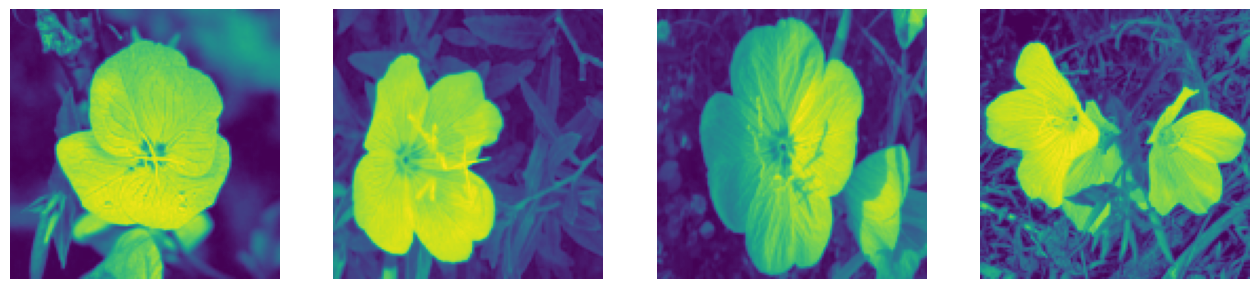

In [62]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

num_images = 4
for i in range(num_images):
    image = dataset["train"][i]["images"][0]

    axs[i].imshow(image)
    axs[i].set_axis_off()

In [ ]:
# your code

Ваши визуализации

In [ ]:
# your visualization

### [3 балла] Реализация обучения модели latent diffusion

Напоминание про реализацию модели [Latent Diffusion](https://nn.labml.ai/diffusion/stable_diffusion/latent_diffusion.html)

Для того, чтобы из кода обучения Diffusion получить обучения Latent Diffusion, вам нужно добавить VQ-VAE и заморозить! и обрабатывать изображения с помощью `vae.encode`. Далее полученные latent, подаются в стандартный пайплайн обучения. Учтите, что latent имеет меньшую размерность и вам может понадобиться уменьшить число слоёв в архитектуре UNet.

В качестве модели VQ-VAE вы можете воспользоваться предобученным VQ-VAE от Stable diffusion.

**Ожидаемый результат**

В качестве результатов модели, от вас требуется предоставить визуализации генераций, полученных от вашей модели, и код обучения модели.

In [ ]:
from diffusers import AutoencoderKL

vae = AutoencoderKL.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="vae")

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


In [ ]:
# your code

### [2 балла] Анализ влияния scheduler на качество генерации

 На качество генерации может влиять используемый scheduler и число шагов, поэтому в этой части домашнего задания, вам предлагается происследовать визуально как scheduler и число шагов влияют на качество генерации. Вам предлагается рассмотреть качество генерации на 10 различных числах шагов и,  используя различные scheduler.


 В качестве scheduler предлагается стандартный DDPM, DDIM, DPMSolver (Другие scheduler не воспрещаются). Обратите внимание, что DDIM и DPMSolver являются детерминированными scheduler, а значит результат у них должен получаться одиннаковый.

 **Ожидаемый результат**

 В качестве результатов в этом пункте от вас требуется предоставить визуализации картинок в различных вариации числа шагов и scheduler и сделать выводы, какие параметры лучше использовать. Вы можете выполнить эту часть, не используя обученную выше модель, а используя стандартные pipeline StableDiffusion

In [ ]:
# your code + visualizations

### Дополнительное задание [дополнительный 1 балл]. Модификации conditional guidance*
*Дополнительный балл не умножается на коэффициент домашнего задания*

---

Далее, вам предлагается реализовать conditional guidance на этом датасете. Как уже упоминалось на лекции механизм conditional guidance позволяет вам генерировать изображения с выбранными вами условиями (картинки определенных цветков, например). На семинаре 2 был показан участок кода, который реализовал условную генерацию, однако для этого вам нужно добавить прокидывание условия в UNet и чуть поменять процесс условной генерации. При реализации вы можете опираться адаптировать следующую [реализацию](https://github.com/TeaPearce/Conditional_Diffusion_MNIST).

**Ожидаемый результат**

В качестве результатов модели, от вас требуется предоставить визуализации генераций, полученных от вашей модели, и код обучения модели.
